# 02 — Retail Trade Dynamics Across Euro Area Countries

## Economic Question
How does retail activity evolve over time across core euro-area economies,
and to what extent do countries share common retail cycles?

## Motivation
Retail Trade Index (RTI) reflects:
- Household demand
- Income expectations
- Business cycle conditions

Understanding its dynamics helps identify:
- Common euro-area cycles
- Country-specific deviations
- Crisis sensitivity and recovery patterns

## Objective of This Notebook
1. Study RTI levels and growth dynamics
2. Compare countries visually and statistically
3. Identify common vs idiosyncratic movements

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("../data/processed/macro_panel.csv")

df["month_dt"] = pd.to_datetime(df["month"])
df = df.sort_values(["country", "month_dt"]).reset_index(drop=True)

df.head()

,country,month,rti_index,hicp_index,hfce,cci,us_cpi,us_unemployment,us_fed_funds,us_industrial_prod,month_dt
0,AT,2010-01,99.5,108.12,NaN,-4.9,217.488,9.8,0.11,89.3426,2010-01-01
1,AT,2010-02,100.7,108.34,NaN,-4.6,217.281,9.8,0.13,89.6779,2010-02-01
2,AT,2010-03,100.7,109.46,NaN,-8.6,217.353,9.9,0.16,90.2928,2010-03-01
3,AT,2010-04,99.9,109.69,NaN,-5.8,217.403,9.9,0.20,90.5991,2010-04-01
4,AT,2010-05,99.4,109.63,NaN,-9.9,217.290,9.6,0.20,91.8230,2010-05-01


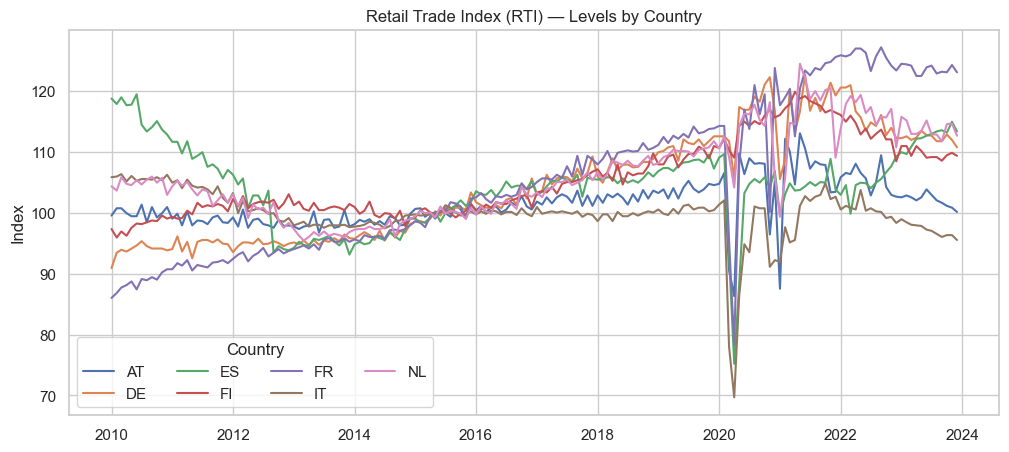

In [3]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=df,
    x="month_dt",
    y="rti_index",
    hue="country",
    linewidth=1.5
)
plt.title("Retail Trade Index (RTI) — Levels by Country")
plt.xlabel("")
plt.ylabel("Index")
plt.legend(title="Country", ncol=4)
plt.show()

## Retail Trade Index — Levels

Key observations:

- All countries share broad medium-term movements
- Crisis periods are clearly visible:
  - 2012–2013 euro-area slowdown
  - 2020 COVID shock
- Differences in amplitude suggest:
  - Structural differences in consumption
  - Different recovery speeds

Levels capture long-run trends but mask short-term dynamics.

In [4]:
df["rti_growth"] = (
    df.groupby("country")["rti_index"]
      .pct_change() * 100
)

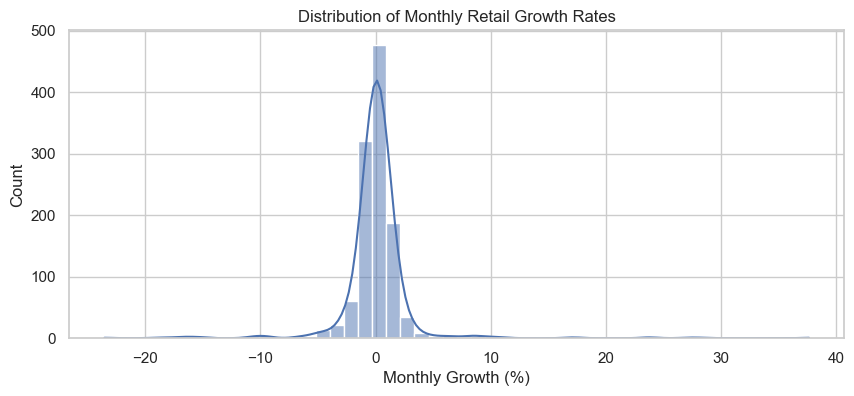

In [5]:
plt.figure(figsize=(10, 4))
sns.histplot(
    data=df,
    x="rti_growth",
    bins=50,
    kde=True
)
plt.title("Distribution of Monthly Retail Growth Rates")
plt.xlabel("Monthly Growth (%)")
plt.show()

## Retail Growth Rates

- Growth rates are centered close to zero
- Distribution exhibits:
  - Fat tails (crises)
  - Occasional sharp contractions
- Monthly volatility is economically meaningful

Growth rates are more suitable for:
- Cyclical analysis
- Shock identification
- Regression and ML models

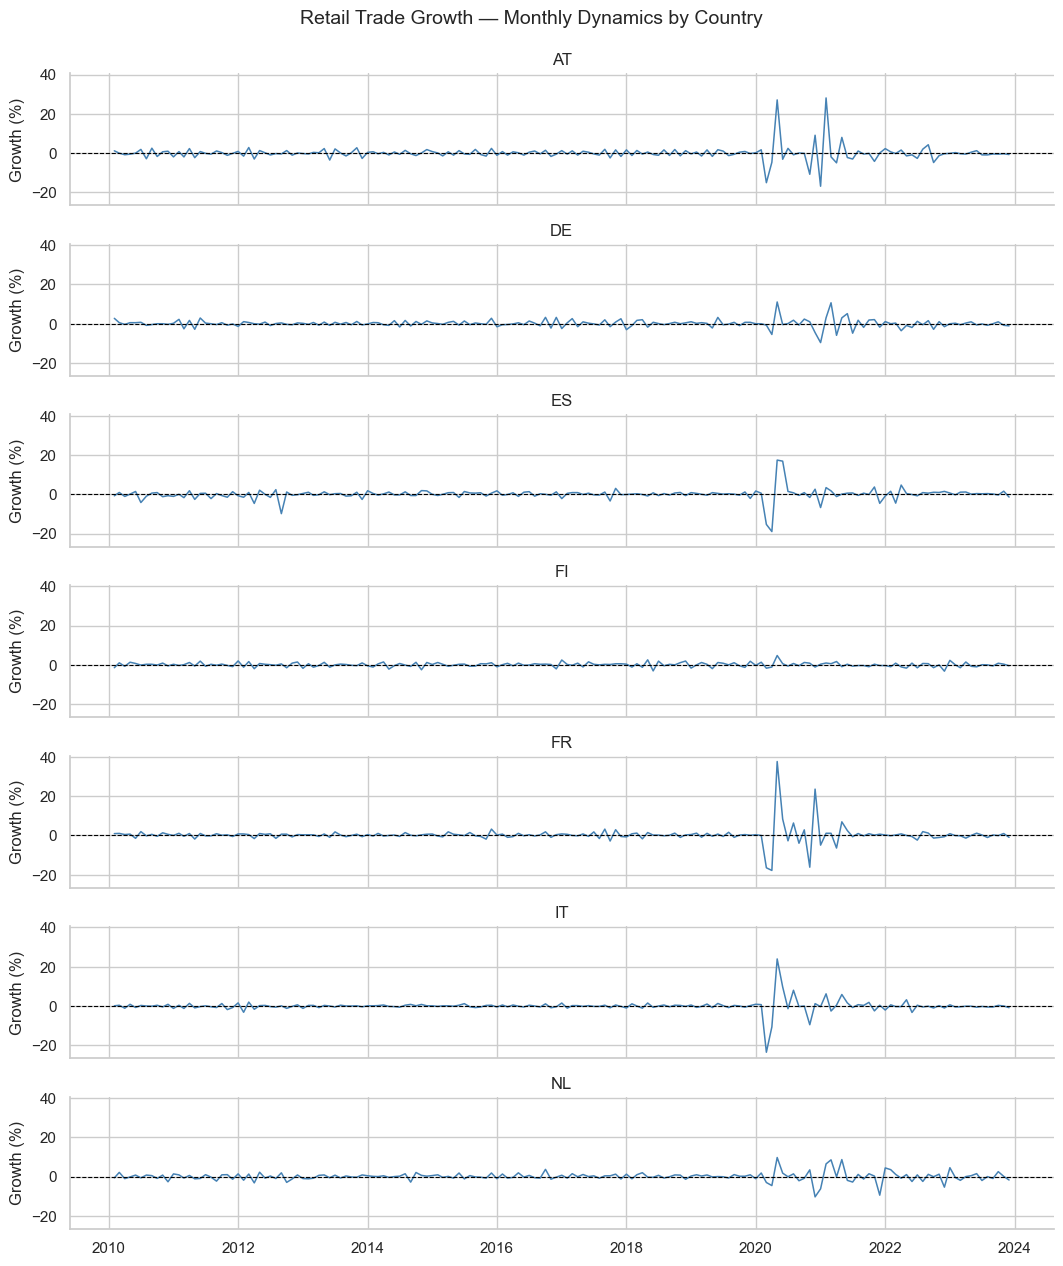

In [6]:
g = sns.FacetGrid(
    df,
    row="country",
    height=1.8,      # controls panel height
    aspect=6,        # controls width
    sharey=True
)

g.map_dataframe(
    sns.lineplot,
    x="month_dt",
    y="rti_growth",
    linewidth=1.1,
    color="steelblue"
)

for ax in g.axes.flat:
    ax.axhline(0, color="black", linestyle="--", linewidth=0.8)

g.set_axis_labels("", "Growth (%)")
g.set_titles("{row_name}")
g.fig.suptitle(
    "Retail Trade Growth — Monthly Dynamics by Country",
    y=1.02,
    fontsize=14
)

plt.show()

## Growth Dynamics Across Countries

- Strong synchronization during downturns
- Crisis periods dominate volatility
- Recoveries are uneven across countries

This suggests:
- Common euro-area shocks
- Country-specific resilience and adjustment mechanisms

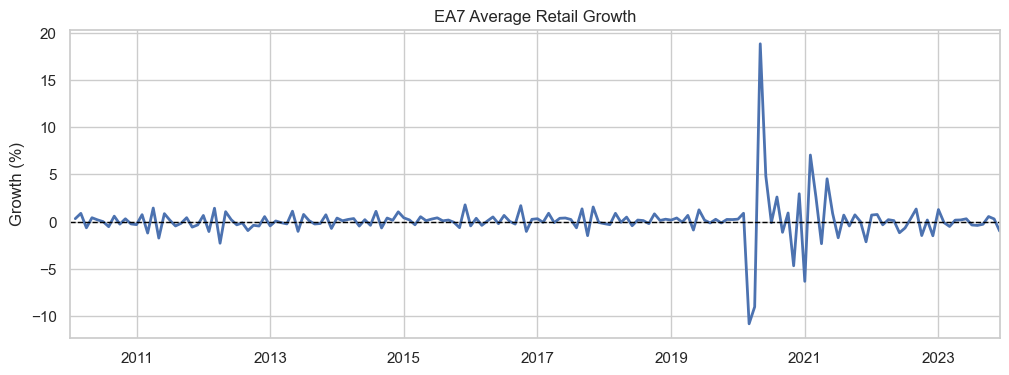

In [7]:
ea7_growth = (
    df.groupby("month_dt")["rti_growth"]
      .mean()
)

plt.figure(figsize=(12, 4))
ea7_growth.plot(linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("EA7 Average Retail Growth")
plt.xlabel("")
plt.ylabel("Growth (%)")
plt.show()

## EA7 Aggregate Retail Cycle

The euro-area average reveals:

- Clear business-cycle structure
- Deep contraction in 2020
- Strong rebound followed by normalization

This aggregate series represents the
**common retail demand cycle** across EA7.

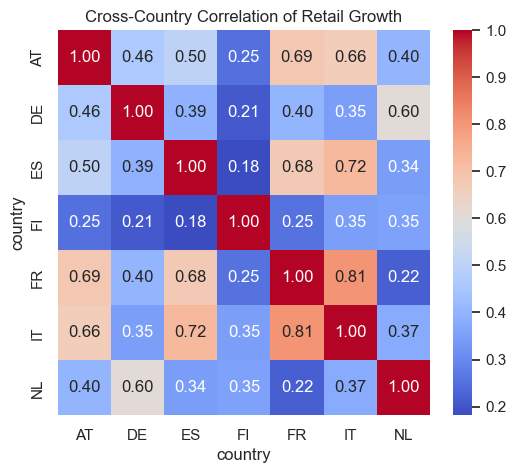

In [8]:
pivot_growth = df.pivot(
    index="month_dt",
    columns="country",
    values="rti_growth"
)

corr_matrix = pivot_growth.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Cross-Country Correlation of Retail Growth")
plt.show()

## Cross-Country Retail Synchronization

- High correlations across most country pairs
- Confirms presence of:
  - Common demand shocks
  - Integrated retail cycles

However, correlations are not perfect,
leaving room for country-specific dynamics.

## Key Takeaways

- Retail activity is highly synchronized across EA7
- Growth rates reveal rich cyclical dynamics
- Crisis periods dominate volatility patterns
- Both common and idiosyncratic components exist

## Link to Next Notebook
➡️ **Notebook 03 — Inflation & Consumption Link**  
We now examine how inflation dynamics interact with retail activity.